<a href="https://colab.research.google.com/github/Navjotkhatri/Real_Estate_Analysis_EDA/blob/main/Real_Estate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Real Estate Analysis Project**

## **Overview**

This project involves analyzing real estate data to uncover trends, make predictions, and provide actionable insights for stakeholders. The analysis includes data cleaning, exploratory data analysis (EDA), and predictive modeling to understand property values and identify factors influencing real estate prices.

Consider including the following metrics in your analysis:

Cost per Square Foot

Project Type distribution

Flat booking status percentage (over the years or location-wise)

Return on investment of projects (Project Profit)

In [29]:

#import library
from ast import increment_lineno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
alldata_df=pd.read_csv("/content/drive/MyDrive/Assignment_reeva/AllData.csv")

In [31]:
alldata_df.head()

,projectAckNo,promoterType,projRegNo,promoterEmailId,formOneId,formTwoId,certificateId,projectType,certificateUid,projRegId,promoterId,approvedDate,promoterName,appSubmissionDate,projectName,formThreeId,wfoId
0,PR/GANDHINAGAR/KALOL/AUDA/170720/000112,COMPANY,PR/GJ/GANDHINAGAR/KALOL/AUDA/MAA00023/EX1/100119,supercity.luxuria2@gmail.com,16348,18617,303496,Mixed Development,IYKCU6VLGGFN890HPEH5OJC45N2URSJINZYSV7LNV2LG2J...,198,13575,2017-08-29 00:00:00,SHRINIVAS ORGANISORS PRIVATE LIMITED,2017-07-20 00:00:00,SUPER CITY PHASE 1,265740,198
1,PR/AHMEDABAD/AHMADABAD CITY/AHMEDABAD TPO/1707...,PARTNERSHIP FIRM,PR/GJ/AHMEDABAD/AHMADABAD CITY/AUDA/CAA00045/0...,thefirstrera@gmail.com,7651,10032,83518,Commercial,JTDQ6PBWY6YHRK1P3INABJ57N0CYCUHBWHUWVHVGLG7PCS...,312,502,2017-01-09 00:00:00,Synthesis Corporation,2017-07-25 00:00:00,THE FIRST,239188,312
2,PR/AHMEDABAD/AHMADABAD CITY/AHMEDABAD TPO/1707...,COMPANY,PR/GJ/AHMEDABAD/AHMADABAD CITY/AUDA/MAA00012/2...,rera@ganeshhousing.net,11606,13113,83437,Mixed Development,F21G5ZHZN5OX5OAXYMC9C9X1VMMJA7KWIA3WG31QWINWFN...,344,543,2017-08-24 00:00:00,Essem Infra Private Limited,2017-07-30 00:00:00,MAPLE TREE,238469,344
3,PR/AHMEDABAD/AHMADABAD CITY/AUDA/170729/000237,LIMITED LIABILITY PARTNERSHIP FIRM,PR/GJ/AHMEDABAD/AHMADABAD CITY/AUDA/CAA00003/2...,sumel8.rera@hnsafal.com,179,136,83395,Commercial,GMUCWGJAB8GM2A1D69RZNVHDXNI46E765G6LY7G7YAEP9P...,389,610,2017-08-21 00:00:00,HN SAFAL REALTECH LLP,2017-07-29 00:00:00,Sumel-8,240923,389
4,PR/AHMEDABAD/AHMADABAD CITY/AHMEDABAD TPO/1707...,LIMITED LIABILITY PARTNERSHIP FIRM,PR/GJ/AHMEDABAD/AHMADABAD CITY/AUDA/CAA00002/2...,one42farpoint@gmail.com,19320,22533,83430,Commercial,0JBMHTCTJ1T51BKTLN2TR0Q2F1YPOZS9ACL39RNL6L1BBP...,475,744,2017-08-21 00:00:00,FARPOINT PROPERTIES LLP,2017-07-28 00:00:00,ONE42,238348,475


In [32]:
formthreeA_df=pd.read_csv("/content/drive/MyDrive/Assignment_reeva/FormThreeA.csv")
formthreeB_df=pd.read_csv("/content/drive/MyDrive/Assignment_reeva/FormThreeB.csv")
location_df=pd.read_csv("/content/drive/MyDrive/Assignment_reeva/Location.csv")
distict_df=pd.read_csv("/content/drive/MyDrive/Assignment_reeva/district.csv")

In [33]:
formthreeA_df.head()

,id,formThreePk,blockId,blockName,usage,flatNo,carpetArea,areaofExBalcony,status,unitConsideration,encumbranceStatus,dateOfAgrrement,redeveloped,createdOn,projectRegID,receivedAmount,balanceAmount
0,22288167,238348,455,North Tower,Office,NT-101-102-103,452.46,0.0,BOOKED,54530683,No Encumbrance,,NO,,475,52020700,2510000
1,22288168,238348,455,North Tower,Office,NT-104,226.80,0.0,UNBOOKED,34200000,No Encumbrance,,NO,,475,0,34200000
2,22288169,238348,455,North Tower,Office,NT-105,229.68,0.0,BOOKED,28978238,No Encumbrance,,NO,,475,25474200,3504070
3,22288170,238348,455,North Tower,Office,NT-201-202-203-204-205,908.94,0.0,BOOKED,106202043,No Encumbrance,,NO,,475,99168200,7033820
4,22288171,238348,455,North Tower,Office,NT-301-302-303-304-305,908.94,0.0,BOOKED,106202043,No Encumbrance,,NO,,475,94535100,11667000


In [34]:
formthreeB_df.head()

,id,methodLandValuation,valuationReportId,valuationReportUId,amountofPremiumPayableA,acquisitionCostofTDRA,acquisitionCostofTDRB,amountsPayabletoStateGovernmentA,amountsPayabletoStateGovernmentB,landPremiumPayableA,...,estAmtofSalesProceedsinRespectofUnbookedAptmnts_new,estReceivablesofOngoingProject_new,amttobeDepositedinDesigAcc_new,acquisitionCostofLandA,acquisitionCostofLandB,amountofPremiumPayableB,balAmtofReceivablesfromBookedAptmnts,estAmtofSalesProceedsinRespectofUnbookedAptmnts,estReceivablesofOngoingProject,amttobeDepositedinDesigAcc
0,15518,,,,0,0,0,3075000,3075000,0,...,,,,173524000,173524000,0,412725000,1177200000,1589920000,70
1,8775,,,,295000000,0,0,0,0,0,...,,,,61186500,61186500,295000000,182897000,375147000,558044000,100
2,10921,,,,597700000,0,0,169100000,169098743,0,...,,,,3689800000,3701180000,629604000,2842230000,1982630000,4824860000,70
3,403,,,,126902000,0,0,17797600,17797600,0,...,,,,1197430000,1197430000,126902000,890747000,1906260000,2797010000,70
4,18311,,,,35695000,188300000,188300000,64900650,64900650,0,...,,,,1100000000,1100000000,35695000,603818000,633300000,1237120000,70


In [35]:
location_df.head()

,locId,projectName,promotorName,projectCost,projectType,processType,promotorType,projectStatus,address,subDistrictCode,subDistrictName,districtCode,districtName,waterLevel,projectId,status,coordinates,centroid
0,100,SUPER CITY PHASE 1,Shrinivas Organisors Pvt Ltd,2861640000,Mixed Development,REG,Company,Ongoing,BHADAJ DENTAL COLLEGE ROADNEAR SCIENCE CITY,,Kalol,GANDHI,Gandhinagar,,198,SUCCESS,"[{""locId"": 897, ""lat"": ""23.095769424301377"", ""...","[23.095461029853023, 72.46593454099164]"
1,251,THE FIRST,Synthesis Corporation,2960000000,Commercial,REG,Partnership Firm,Ongoing,"The First Avenue, Beside Keshavbaug Party Plot...",,Ahmedabad City,AHME,Ahmedabad,,312,SUCCESS,"[{""locId"": 2348, ""lat"": ""23.030730524477008"", ...","[23.03039852052578, 72.53031990226191]"
2,2213,MAPLE TREE,Essem Infra Private Limited,7048500000,Mixed Development,REG,Company,Ongoing,"MAPLE TREEOpp Patel Media, Sun - n - Step Club...",,Ahmedabad City,AHME,Ahmedabad,,344,SUCCESS,"[{""locId"": 17808, ""lat"": ""23.05525168980046"", ...","[23.055541498119435, 72.52856516746678]"
3,9411,Sumel-8,HN SAFAL REALTECH LLP,3035230000,Commercial,REG,Limited Liability Partnership,Ongoing,"Bharat Bobin Mill Compound, Near Ajit Mill Cha...",,Ahmedabad City,AHME,Ahmedabad,,389,SUCCESS,"[{""locId"": 66098, ""lat"": ""23.022880018483267"",...","[23.02187272676585, 72.63291469731483]"
4,1577,ONE42,FARPOINT PROPERTIES LLP,2757600000,Commercial,REG,Limited Liability Partnership,Ongoing,"ONE42, Off Ambli RoadAmbli",,Ahmedabad City,AHME,Ahmedabad,,475,SUCCESS,"[{""locId"": 12989, ""lat"": ""23.031071227876392"",...","[23.030796527307633, 72.49226444883587]"


In [36]:
distict_df.head()

,districtName,regFee,project_cost,project_address,prmtr_com_reg_no,payment_status,payment_token,wfoid,projectCost,projectType,...,disposed_date,project_ack_no,startDate,endDate,hardcopysubmissionDate,pmtr_email_id,project_status,promoterName,approvedOn,promoterAddress
0,Surat,1000000,27699400000,"BLOCK NO.177, VILLAGE KHAJOD, TALUKA MAJURA SURAT",U74140GJ2014NPL081370,Paid,PRC00GGNQ4871,7871,27699400000,Commercial,...,,PR/SURAT/SURAT CITY/SUDA/190311/006925,2017-12-05,2023-06-30,2019-02-26 13:30:00,info@sdbbourse.com,New,SDB DIAMOND BOURSE,2019-04-10,"67, 1ST FLOOR, TAPTI EXPORTS, PATEL FALIA, GOT..."
1,Ahmedabad,10000,16045500000,21 MAHADEVNAGAR COOP.HOUS.SOC.LTD NAVRANGPURA,GUJAH103346,Paid,PRCC4ORPS5567,13567,168676000,Residential/Group Housing,...,,PR/AHMEDABAD/AHMEDABAD CITY/GUJRERA/220204/012276,2021-08-30,2024-06-30,2022-01-07 22:13:12,samyakarise2021@gmail.com,New,SAMYAKTVA DEVELOPERS,2022-03-19,210 RATANA HIGH STREET NARANPURA
2,Vadodara,660150,10779400000,"AGORA CITY CENTRE, NEAR RATRI BAZAR SAMA, SANJ...",U45201GJ2006PTC048481,Paid,PRCKVTJ043396,2396,10779400000,Mixed Development,...,,PR/VADODARA/VADODARA/VADODARA TPO/170830/001960,2017-03-21,2023-06-30,2017-08-30 00:00:00,shreebalaji.ashish49@gmail.com,Ongoing,MANAV INFRASTRUCTURE PRIVATE LIMITED,2017-11-15,"4TH FLOOR,SHREE BALAJI MALL, VISAT GANDHINAGAR..."
3,Vadodara,205822,10113600000,"SHRI RAM CORPORATION, BEHIND SHAKTI GREENS OPP...",GUJVA102779,Paid,PRCVA6D3M6959,14959,1011360000,Residential/Group Housing,...,,PR/VADODARA/CHHOTA UDAIPUR/GUJRERA/221213/013589,2021-05-21,2027-12-31,2022-10-17 15:09:09,ratnam.parkview@gmail.com,New,SHRI RAM CORPORATION,2023-03-03,"247,260,11 Ratnam Park View Shakti Greens, Vas..."
4,Ahmedabad,201015,9111090000,"Karnavati Appartment - 5, Nr. Rishit Residency...",GUJAH201255,Paid,PRC7CYBY34675,8675,921092000,Mixed Development,...,,PR/AHMEDABAD/AHMEDABAD CITY/GANDHINAGAR TPO/19...,2019-05-15,2025-06-30,2019-07-04 12:06:51,sainathbuildcon13@gmail.com,New,SAINATH BUILDCON,2019-08-23,"Karnavati Appartment -5, Nr. Rishit Residency,..."


In [37]:
alldata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   projectAckNo       100 non-null    object
 1   promoterType       100 non-null    object
 2   projRegNo          100 non-null    object
 3   promoterEmailId    100 non-null    object
 4   formOneId          100 non-null    int64 
 5   formTwoId          100 non-null    int64 
 6   certificateId      100 non-null    int64 
 7   projectType        100 non-null    object
 8   certificateUid     100 non-null    object
 9   projRegId          100 non-null    int64 
 10  promoterId         100 non-null    int64 
 11  approvedDate       100 non-null    object
 12  promoterName       100 non-null    object
 13  appSubmissionDate  100 non-null    object
 14  projectName        100 non-null    object
 15  formThreeId        100 non-null    int64 
 16  wfoId              100 non-null    int64 
dty

In [38]:
formthreeA_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59015 entries, 0 to 59014
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59015 non-null  int64  
 1   formThreePk        59015 non-null  int64  
 2   blockId            59015 non-null  object 
 3   blockName          59015 non-null  object 
 4   usage              59015 non-null  object 
 5   flatNo             59015 non-null  object 
 6   carpetArea         59015 non-null  float64
 7   areaofExBalcony    59015 non-null  float64
 8   status             59015 non-null  object 
 9   unitConsideration  59015 non-null  int64  
 10  encumbranceStatus  59015 non-null  object 
 11  dateOfAgrrement    59015 non-null  object 
 12  redeveloped        59015 non-null  object 
 13  createdOn          59015 non-null  object 
 14  projectRegID       59015 non-null  int64  
 15  receivedAmount     59015 non-null  int64  
 16  balanceAmount      590

In [39]:
formthreeB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 86 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   100 non-null    int64  
 1   methodLandValuation                                  100 non-null    object 
 2   valuationReportId                                    100 non-null    object 
 3   valuationReportUId                                   100 non-null    object 
 4   amountofPremiumPayableA                              100 non-null    int64  
 5   acquisitionCostofTDRA                                100 non-null    int64  
 6   acquisitionCostofTDRB                                100 non-null    int64  
 7   amountsPayabletoStateGovernmentA                     100 non-null    int64  
 8   amountsPayabletoStateGovernmentB                     100 non-null    in

In [40]:
location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   locId            99 non-null     int64 
 1   projectName      99 non-null     object
 2   promotorName     99 non-null     object
 3   projectCost      99 non-null     int64 
 4   projectType      99 non-null     object
 5   processType      99 non-null     object
 6   promotorType     99 non-null     object
 7   projectStatus    99 non-null     object
 8   address          99 non-null     object
 9   subDistrictCode  99 non-null     object
 10  subDistrictName  99 non-null     object
 11  districtCode     99 non-null     object
 12  districtName     99 non-null     object
 13  waterLevel       99 non-null     object
 14  projectId        99 non-null     int64 
 15  status           99 non-null     object
 16  coordinates      99 non-null     object
 17  centroid         99 non-null     obje

In [41]:
distict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   districtName            100 non-null    object
 1   regFee                  100 non-null    int64 
 2   project_cost            100 non-null    int64 
 3   project_address         100 non-null    object
 4   prmtr_com_reg_no        100 non-null    object
 5   payment_status          100 non-null    object
 6   payment_token           100 non-null    object
 7   wfoid                   100 non-null    int64 
 8   projectCost             100 non-null    int64 
 9   projectType             100 non-null    object
 10  projectRegId            100 non-null    int64 
 11  total_est_cost_of_proj  100 non-null    int64 
 12  regNo                   100 non-null    object
 13  projectName             100 non-null    object
 14  districtType            100 non-null    object
 15  projOrg

In [42]:
alldata_df.columns

Index(['projectAckNo', 'promoterType', 'projRegNo', 'promoterEmailId',
       'formOneId', 'formTwoId', 'certificateId', 'projectType',
       'certificateUid', 'projRegId', 'promoterId', 'approvedDate',
       'promoterName', 'appSubmissionDate', 'projectName', 'formThreeId',
       'wfoId'],
      dtype='object')

In [43]:
formthreeA_df.columns

Index(['id', 'formThreePk', 'blockId', 'blockName', 'usage', 'flatNo',
       'carpetArea', 'areaofExBalcony', 'status', 'unitConsideration',
       'encumbranceStatus', 'dateOfAgrrement', 'redeveloped', 'createdOn',
       'projectRegID', 'receivedAmount', 'balanceAmount'],
      dtype='object')

In [44]:
formthreeB_df.columns

Index(['id', 'methodLandValuation', 'valuationReportId', 'valuationReportUId',
       'amountofPremiumPayableA', 'acquisitionCostofTDRA',
       'acquisitionCostofTDRB', 'amountsPayabletoStateGovernmentA',
       'amountsPayabletoStateGovernmentB', 'landPremiumPayableA',
       'landPremiumPayableB', 'estimatedConstructionCostOfRehabA',
       'estimatedConstructionCostOfRehabB', 'actualCostofConstructionOfReDevA',
       'actualCostofConstructionOfReDevB', 'costTowardsClearanceA',
       'costTowardsClearanceB', 'costofASRLinkedPremiumA',
       'costofASRLinkedPremiumB', 'subTotalofLandCostA', 'subTotalofLandCostB',
       'subTotalofLandCostaFlag', 'subTotalofLandCostbFlag',
       'estCostofConstructasCertifybyEngA',
       'actualCostofConstructIncurredAndPaidB',
       'onSiteExpenditureforDevelopmentA', 'onSiteExpenditureforDevelopmentB',
       'paymentofTaxesA', 'paymentofTaxesB', 'interestPayabletoFinanceA',
       'interestPayabletoFinanceB', 'subTotofDevelopCostA',
       '

In [45]:
location_df.columns

Index(['locId', 'projectName', 'promotorName', 'projectCost', 'projectType',
       'processType', 'promotorType', 'projectStatus', 'address',
       'subDistrictCode', 'subDistrictName', 'districtCode', 'districtName',
       'waterLevel', 'projectId', 'status', 'coordinates', 'centroid'],
      dtype='object')

In [46]:
distict_df.columns

Index(['districtName', 'regFee', 'project_cost', 'project_address',
       'prmtr_com_reg_no', 'payment_status', 'payment_token', 'wfoid',
       'projectCost', 'projectType', 'projectRegId', 'total_est_cost_of_proj',
       'regNo', 'projectName', 'districtType', 'projOrgFDate', 'extDate',
       'disposed_date', 'project_ack_no', 'startDate', 'endDate',
       'hardcopysubmissionDate', 'pmtr_email_id', 'project_status',
       'promoterName', 'approvedOn', 'promoterAddress'],
      dtype='object')

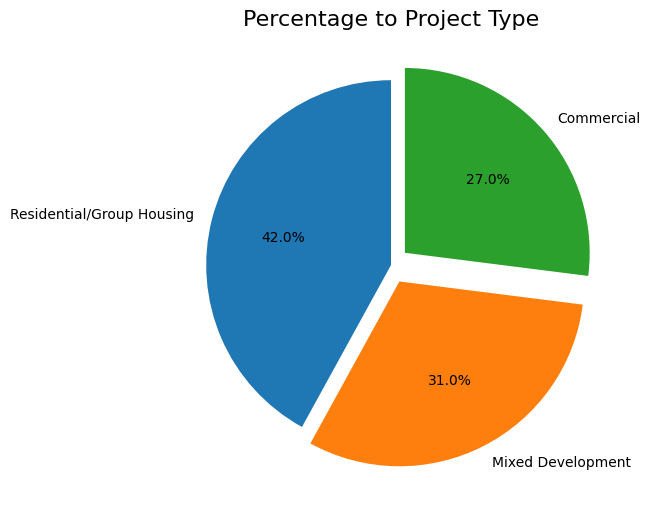

In [61]:
#Project Type distribution
plt.figure(figsize=(8,6))
plt.title("Percentage to Project Type",fontsize = 16)
plt.pie(alldata_df.projectType.value_counts(), labels=alldata_df.projectType.value_counts().index,autopct='%1.1f%%',startangle=90,explode=(0, 0.1,0.1))
plt.show()

**The pie chart illustrates the distribution of project types within the dataset. It clearly shows that the majority of projects are categorized as residential or group housing, making up 42% of the total. The second most common project type is mixed development, accounting for 31%. Commercial projects represent the smallest portion, comprising 27% of the dataset.**

In [49]:
formthreeA_df.tail()

,id,formThreePk,blockId,blockName,usage,flatNo,carpetArea,areaofExBalcony,status,unitConsideration,encumbranceStatus,dateOfAgrrement,redeveloped,createdOn,projectRegID,receivedAmount,balanceAmount
59010,39911595,370089,,TOWER-H,Shop,FF-10,56.42,0.0,BOOKED,7189000,Released,,NO,2024-04-22 21:15:28,6326,7124810,64187
59011,39911596,370089,,TOWER-H,Shop,FF-11,54.79,0.0,BOOKED,2551000,Released,2023-02-22 00:00:00,NO,2024-04-22 21:15:28,6326,2551000,0
59012,39911597,370089,,TOWER-H,Shop,FF-12,51.70,0.0,BOOKED,2243500,Released,2023-02-22 00:00:00,NO,2024-04-22 21:15:28,6326,2243500,0
59013,39911598,370089,,TOWER-H,Shop,FF-13,83.19,0.0,BOOKED,9491965,Released,2021-02-05 00:00:00,NO,2024-04-22 21:15:28,6326,9407210,84751
59014,39911599,370089,,TOWER-H,Shop,FF-14,55.76,0.0,BOOKED,4809285,Released,,NO,2024-04-22 21:15:28,6326,4809280,0


In [50]:
formthreeA_df.tail()

,id,formThreePk,blockId,blockName,usage,flatNo,carpetArea,areaofExBalcony,status,unitConsideration,encumbranceStatus,dateOfAgrrement,redeveloped,createdOn,projectRegID,receivedAmount,balanceAmount
59010,39911595,370089,,TOWER-H,Shop,FF-10,56.42,0.0,BOOKED,7189000,Released,,NO,2024-04-22 21:15:28,6326,7124810,64187
59011,39911596,370089,,TOWER-H,Shop,FF-11,54.79,0.0,BOOKED,2551000,Released,2023-02-22 00:00:00,NO,2024-04-22 21:15:28,6326,2551000,0
59012,39911597,370089,,TOWER-H,Shop,FF-12,51.70,0.0,BOOKED,2243500,Released,2023-02-22 00:00:00,NO,2024-04-22 21:15:28,6326,2243500,0
59013,39911598,370089,,TOWER-H,Shop,FF-13,83.19,0.0,BOOKED,9491965,Released,2021-02-05 00:00:00,NO,2024-04-22 21:15:28,6326,9407210,84751
59014,39911599,370089,,TOWER-H,Shop,FF-14,55.76,0.0,BOOKED,4809285,Released,,NO,2024-04-22 21:15:28,6326,4809280,0


In [51]:
df1=formthreeA_df.groupby('projectRegID')['status'].value_counts().reset_index(name='count')

In [52]:
df1.head()

,projectRegID,status,count
0,198,BOOKED,322
1,198,UNBOOKED,86
2,312,BOOKED,253
3,312,UNBOOKED,73
4,344,BOOKED,417


In [53]:
df1.tail()

,projectRegID,status,count
185,19577,UNBOOKED,102
186,19632,UNBOOKED,140
187,19662,UNBOOKED,521
188,19668,UNBOOKED,388
189,19680,UNBOOKED,492


In [54]:
df_pivot = df1.pivot(index='projectRegID', columns='status', values='count')

print(df_pivot)

status        BOOKED  UNBOOKED
projectRegID                  
198            322.0      86.0
312            253.0      73.0
344            417.0     137.0
389            998.0       NaN
475             85.0      21.0
...              ...       ...
19577            NaN     102.0
19632            NaN     140.0
19662            NaN     521.0
19668            NaN     388.0
19680            NaN     492.0

[100 rows x 2 columns]


In [57]:
df_pivot.reset_index(inplace=True)

In [ ]:
pd.set_option('display.max_columns', None)
distict_df['projectRegId'].value_counts()

In [58]:
df_pivot

status,projectRegID,BOOKED,UNBOOKED
0,198,322.0,86.0
1,312,253.0,73.0
2,344,417.0,137.0
3,389,998.0,NaN
4,475,85.0,21.0
...,...,...,...
95,19577,NaN,102.0
96,19632,NaN,140.0
97,19662,NaN,521.0
98,19668,NaN,388.0


In [75]:
df_booked=df_pivot.sort_values(by='BOOKED',ascending=False).head(10)

In [76]:
df_booked

status,projectRegID,BOOKED,UNBOOKED
40,7871,4341.0,457.0
11,1109,1933.0,1821.0
7,978,1168.0,20.0
68,17207,1153.0,1081.0
3,389,998.0,NaN
47,9036,967.0,177.0
12,1136,887.0,51.0
21,4101,852.0,99.0
15,2396,845.0,940.0
53,10927,835.0,161.0


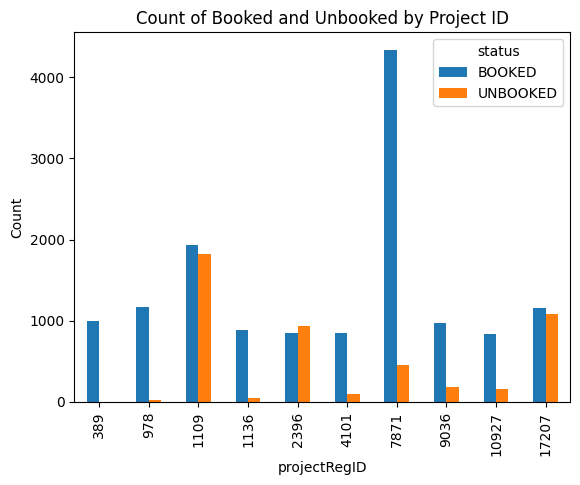

In [150]:
grouped_df = df_booked.groupby('projectRegID').sum()
grouped_df.plot(kind='bar', stacked=False)
plt.xlabel('projectRegID')
plt.ylabel('Count')
plt.title('Count of Booked and Unbooked by Project ID')
plt.show()

**The stacked chart above displays the top ten projects with the highest bookings. The project with ID 7871 leads with 4,341 units booked. Following that, the project with ID 1109 ranks second with approximately 1,900 units booked. The project with ID 389 has a total of 998 units booked, with no unbooked units remaining.**

In [85]:
distict_df.head()

,districtName,regFee,project_cost,project_address,prmtr_com_reg_no,payment_status,payment_token,wfoid,projectCost,projectType,...,disposed_date,project_ack_no,startDate,endDate,hardcopysubmissionDate,pmtr_email_id,project_status,promoterName,approvedOn,promoterAddress
0,Surat,1000000,27699400000,"BLOCK NO.177, VILLAGE KHAJOD, TALUKA MAJURA SURAT",U74140GJ2014NPL081370,Paid,PRC00GGNQ4871,7871,27699400000,Commercial,...,,PR/SURAT/SURAT CITY/SUDA/190311/006925,2017-12-05,2023-06-30,2019-02-26 13:30:00,info@sdbbourse.com,New,SDB DIAMOND BOURSE,2019-04-10,"67, 1ST FLOOR, TAPTI EXPORTS, PATEL FALIA, GOT..."
1,Ahmedabad,10000,16045500000,21 MAHADEVNAGAR COOP.HOUS.SOC.LTD NAVRANGPURA,GUJAH103346,Paid,PRCC4ORPS5567,13567,168676000,Residential/Group Housing,...,,PR/AHMEDABAD/AHMEDABAD CITY/GUJRERA/220204/012276,2021-08-30,2024-06-30,2022-01-07 22:13:12,samyakarise2021@gmail.com,New,SAMYAKTVA DEVELOPERS,2022-03-19,210 RATANA HIGH STREET NARANPURA
2,Vadodara,660150,10779400000,"AGORA CITY CENTRE, NEAR RATRI BAZAR SAMA, SANJ...",U45201GJ2006PTC048481,Paid,PRCKVTJ043396,2396,10779400000,Mixed Development,...,,PR/VADODARA/VADODARA/VADODARA TPO/170830/001960,2017-03-21,2023-06-30,2017-08-30 00:00:00,shreebalaji.ashish49@gmail.com,Ongoing,MANAV INFRASTRUCTURE PRIVATE LIMITED,2017-11-15,"4TH FLOOR,SHREE BALAJI MALL, VISAT GANDHINAGAR..."
3,Vadodara,205822,10113600000,"SHRI RAM CORPORATION, BEHIND SHAKTI GREENS OPP...",GUJVA102779,Paid,PRCVA6D3M6959,14959,1011360000,Residential/Group Housing,...,,PR/VADODARA/CHHOTA UDAIPUR/GUJRERA/221213/013589,2021-05-21,2027-12-31,2022-10-17 15:09:09,ratnam.parkview@gmail.com,New,SHRI RAM CORPORATION,2023-03-03,"247,260,11 Ratnam Park View Shakti Greens, Vas..."
4,Ahmedabad,201015,9111090000,"Karnavati Appartment - 5, Nr. Rishit Residency...",GUJAH201255,Paid,PRC7CYBY34675,8675,921092000,Mixed Development,...,,PR/AHMEDABAD/AHMEDABAD CITY/GANDHINAGAR TPO/19...,2019-05-15,2025-06-30,2019-07-04 12:06:51,sainathbuildcon13@gmail.com,New,SAINATH BUILDCON,2019-08-23,"Karnavati Appartment -5, Nr. Rishit Residency,..."


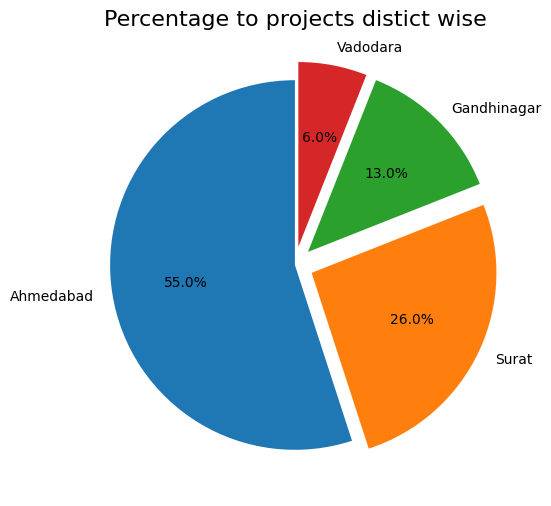

In [88]:
#pie chart on price of apps
plt.figure(figsize=(8,6))
plt.title("Percentage to projects distict wise",fontsize = 16)
plt.pie(distict_df.districtName.value_counts(), labels=distict_df.districtName.value_counts().index,autopct='%1.1f%%',startangle=90,explode=(0, 0.1,0.1,0.1))
plt.show()

**The pie chart above illustrates the distribution of projects by district. It’s evident that the majority of projects are located in Ahmedabad, making up around 55% of the total. Surat follows with 26%, while Vadodara holds the smallest share at approximately 6% within this dataset.**

In [105]:
df_commercial=distict_df[distict_df['projectType']=='Commercial']

In [108]:
df_commercial.head()

,districtName,regFee,project_cost,project_address,prmtr_com_reg_no,payment_status,payment_token,wfoid,projectCost,projectType,...,disposed_date,project_ack_no,startDate,endDate,hardcopysubmissionDate,pmtr_email_id,project_status,promoterName,approvedOn,promoterAddress
0,Surat,1000000,27699400000,"BLOCK NO.177, VILLAGE KHAJOD, TALUKA MAJURA SURAT",U74140GJ2014NPL081370,Paid,PRC00GGNQ4871,7871,27699400000,Commercial,...,,PR/SURAT/SURAT CITY/SUDA/190311/006925,2017-12-05,2023-06-30,2019-02-26 13:30:00,info@sdbbourse.com,New,SDB DIAMOND BOURSE,2019-04-10,"67, 1ST FLOOR, TAPTI EXPORTS, PATEL FALIA, GOT..."
5,Surat,1000000,8324560000,"TP-33(DUMBHAL),FP-13, NEXT TO MILLENIUM HOUSE ...",GUJSRT172137,Paid,PRC2JTY1X3304,6304,11925000000,Commercial,...,,PR/SURAT/SURAT CITY/SURAT TPO/180601/005415,2018-05-20,2024-11-20,2018-06-01 17:36:04,happybenchmark123@gmail.com,New,HAPPY HOME CORPORATION,2018-06-28,"Shantiniketan, 1st Floor, Near S.D.Jain School..."
7,Surat,1000000,7114300000,"GLOBALE TEXTILE MARKET UMARWADA, KADODARA ROAD...",AAC2804,Paid,PRC436KN13109,1109,7110000000,Commercial,...,,PR/SURAT/SURAT CITY/SURAT TPO/170731/000887,2014-07-22,2019-12-31,2017-07-31 00:00:00,accounts@globale.co.in,Ongoing,GLOBALE INFRASPACE LLP,2017-11-24,"Globale Textile Market Umarwada, Kadodara Road..."
28,Ahmedabad,247175,4374960000,AMBLI ROAD OPPOSITE DISHMAN HOUSE JAYANTILAL P...,AAF2532,Paid,PRCX4S0OR3857,5857,5324960000,Commercial,...,,PR/AHMEDABAD/AHMEDABAD CITY/AUDA/180329/005000,2018-03-22,2023-03-30,2018-03-29 21:31:32,rerancp@navratna.com,New,NAVRATNA BUILDSPACE LLP,2018-04-12,"NAVRATNA HOUSE, NAVRATNA BUSINESS PARK, OPPOS..."
32,Gandhinagar,1111120,4152290000,"Block No.35 (building footprint 35B), Zone-3 i...",ABA5200,Paid,PRC72GP0P6043,17043,4152290000,Commercial,...,,PR/GANDHINAGAR/GANDHINAGAR/GUJRERA/231101/015647,2023-10-17,2029-12-31,2023-10-27 19:28:48,rera.shilpnorthsky@gmail.com,New,SHILP INFRAPROJECTS LLP,2023-11-08,"SHILP HOUSE, SUR NO 220/ 2/4, F P 304/3, TP 50..."


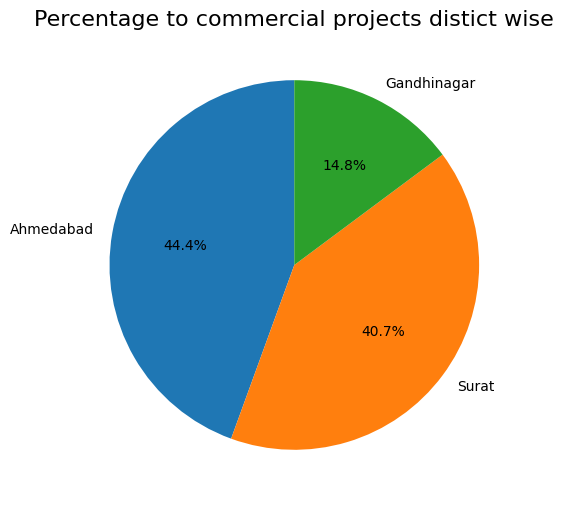

In [110]:
#pie chart on price of apps
plt.figure(figsize=(8,6))
plt.title("Percentage to commercial projects distict wise",fontsize = 16)
plt.pie(df_commercial.districtName.value_counts(), labels=df_commercial.districtName.value_counts().index,autopct='%1.1f%%',startangle=90)
plt.show()

**The pie chart above depicts the distribution of commercial projects by district. Its clear that Ahmedabad has the largest share, accounting for around 45% of commercial projects, followed by Surat with 40%. Gandhinagar represents approximately 14%. Interestingly, according to this dataset and the chart, Vadodara has no projects listed under the commercial category.**

In [106]:
df_cost_commercial=df_commercial.groupby('districtName')['project_cost'].mean().reset_index()

In [100]:
df_cost_commercial

,districtName,project_cost
0,Ahmedabad,3.118998e+09
1,Gandhinagar,3.780840e+09
2,Surat,6.379938e+09


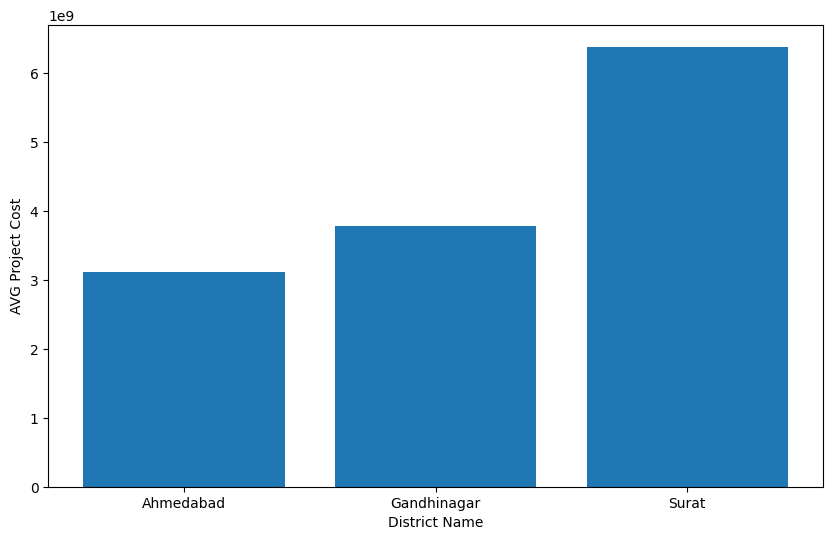

In [112]:
#plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_cost_commercial['districtName'], df_cost_commercial['project_cost'])
plt.xlabel('District Name')
plt.ylabel('AVG Project Cost')
plt.show()

**The chart above shows the average cost of commercial projects across different districts. The graph clearly indicates that Surat has the highest average cost at approximately 600 crore. Gandhinagar follows with an average cost of around 370 crore, while Ahmedabad has the lowest average cost for commercial projects, at around 300 crore.**

In [113]:
distict_df['promoterName'].value_counts()

,count
promoterName,
RAJHANS INFRACON (INDIA) PRIVATE LIMITED,3
SHILP INFRAPROJECTS LLP,3
HAPPY HOME CORPORATION,3
SAFAL GOYAL REALTY LLP,2
SWATISANDHYA PROCON LLP,2
...,...
SUPER SHALIGRAM LLP,1
GSG DEVELOPERS,1
SHIVALIK JHANVI INFRASPACE LLP,1


In [118]:
count_pro_status=distict_df['project_status'].value_counts().reset_index()

In [119]:
count_pro_status

,project_status,count
0,New,75
1,Ongoing,25


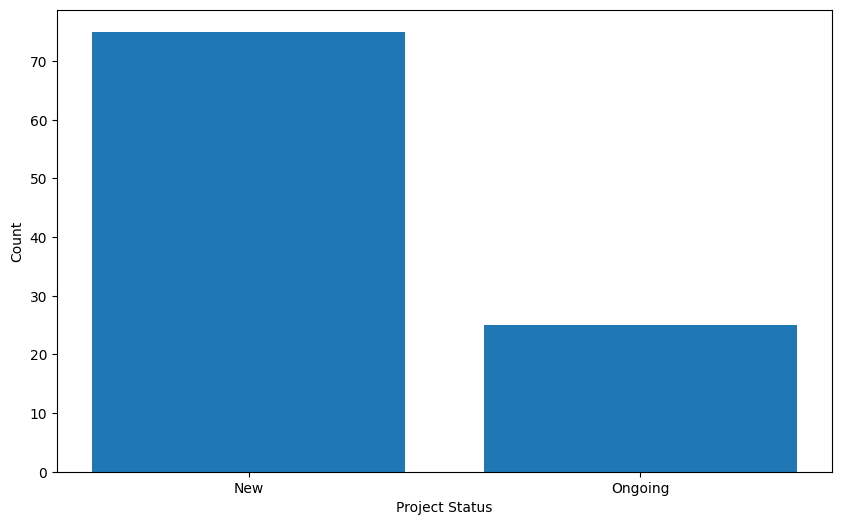

In [121]:
#bar char project status
plt.figure(figsize=(10, 6))
plt.bar(count_pro_status['project_status'], count_pro_status['count'])
plt.xlabel('Project Status')
plt.ylabel('Count')
plt.show()

**The chart above indicates that approximately 75 projects in the dataset are new, while 25 projects are ongoing.**

In [127]:
formthreeA_df.head()

,id,formThreePk,blockId,blockName,usage,flatNo,carpetArea,areaofExBalcony,status,unitConsideration,encumbranceStatus,dateOfAgrrement,redeveloped,createdOn,projectRegID,receivedAmount,balanceAmount
0,22288167,238348,455,North Tower,Office,NT-101-102-103,452.46,0.0,BOOKED,54530683,No Encumbrance,,NO,,475,52020700,2510000
1,22288168,238348,455,North Tower,Office,NT-104,226.80,0.0,UNBOOKED,34200000,No Encumbrance,,NO,,475,0,34200000
2,22288169,238348,455,North Tower,Office,NT-105,229.68,0.0,BOOKED,28978238,No Encumbrance,,NO,,475,25474200,3504070
3,22288170,238348,455,North Tower,Office,NT-201-202-203-204-205,908.94,0.0,BOOKED,106202043,No Encumbrance,,NO,,475,99168200,7033820
4,22288171,238348,455,North Tower,Office,NT-301-302-303-304-305,908.94,0.0,BOOKED,106202043,No Encumbrance,,NO,,475,94535100,11667000


In [131]:
total_balance=formthreeA_df.groupby('projectRegID')['balanceAmount'].sum().reset_index()

In [151]:
total_balance

,projectRegID,balanceAmount
0,198,1589924472
1,312,558043936
2,344,4824852184
3,389,847131863
4,475,1237118288
...,...,...
95,19577,4746577500
96,19632,5478630000
97,19662,4540019200
98,19668,5459817870


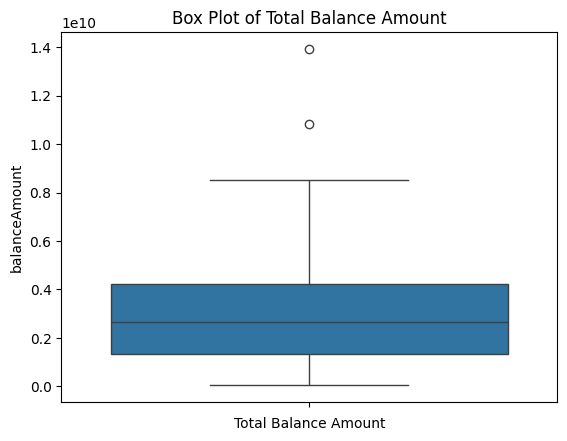

In [153]:
sns.boxplot(data=total_balance['balanceAmount'])
plt.xlabel('Total Balance Amount')
plt.title('Box Plot of Total Balance Amount')
plt.show()


**The box plot above illustrates the distribution of average remaining balance amounts across various projects. The graph shows that the average remaining balance is around 200 crore, with a few projects having significantly higher remaining balances.**

In [134]:
Top_total_balance=total_balance.sort_values(by='balanceAmount',ascending=False).head(10)

In [135]:
Top_total_balance

,projectRegID,balanceAmount
32,6304,13933316000
15,2396,10851833153
87,18965,8523159090
93,19406,8226500000
94,19410,8017152000
72,17770,7498166000
75,17909,7169344529
68,17207,7049411431
81,18765,6318755950
70,17644,6278500000


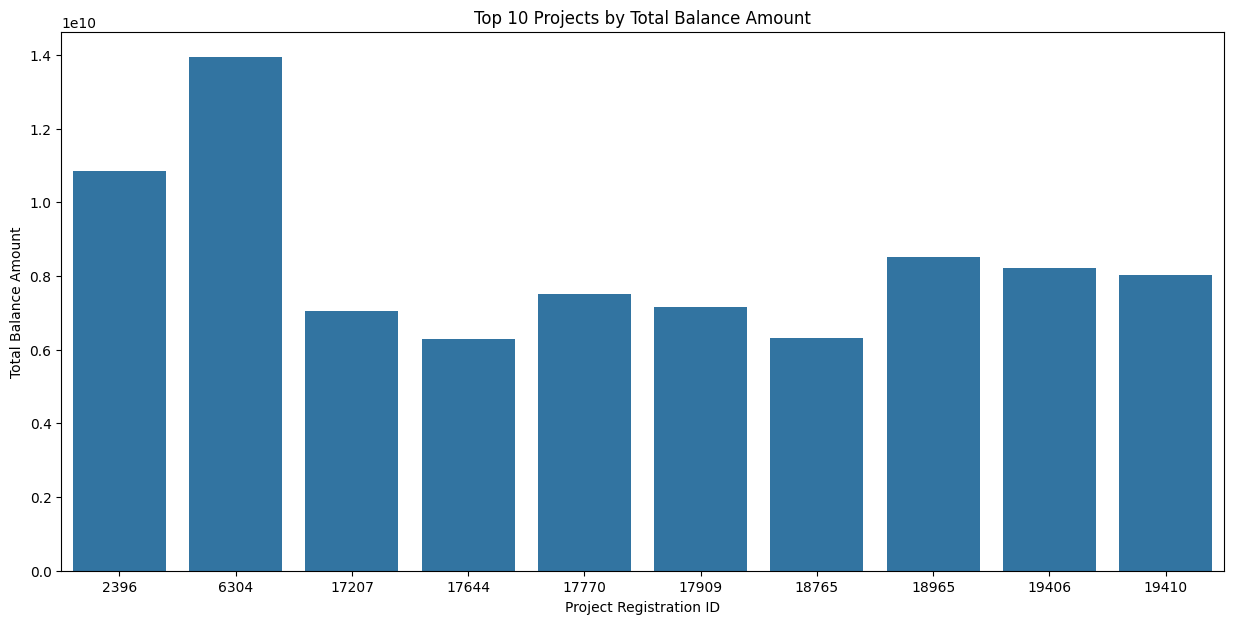

In [146]:
plt.figure(figsize=(15, 7))
sns.barplot(x='projectRegID', y='balanceAmount', data=Top_total_balance)
plt.xlabel('Project Registration ID')
plt.ylabel('Total Balance Amount')
plt.title('Top 10 Projects by Total Balance Amount')
plt.show()

**The bar chart above highlights the top ten projects with the highest remaining balance amounts. It shows that the project with ID 6304 has the largest remaining balance, totaling around 139 crore.**

# **conclusions**

**The majority of projects are concentrated in Ahmedabad, particularly for commercial properties, where Ahmedabad holds the highest share. This suggests a strong market presence and demand in this region.**

**Surat stands out with the highest average cost for commercial projects, indicating that commercial real estate in Surat commands a premium compared to other districts. Gandhinagar also shows a significant average cost, while Ahmedabad, despite its higher project count, has a lower average cost, which may suggest more competitive pricing or smaller project scales.**

**The dataset reveals a notable proportion of new projects, with 75% being recently initiated. This reflects a dynamic and growing market, with only 25% of the projects currently ongoing.**

**The analysis of remaining balance amounts shows that certain projects, like the one with ID 6304, have substantial balances outstanding. This could indicate larger project sizes, delays in payment collection, or ongoing phases that require careful financial monitoring.**

**The focus on specific districts such as Ahmedabad and Surat suggests a concentrated market, where these areas dominate the commercial real estate landscape. In contrast, regions like Vadodara have little to no representation in certain categories, indicating potential gaps or less market activity in those areas.**